In [44]:
# import packages
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, shape
import fiona
fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

import plotly.express as px
from plotly.subplots import make_subplots

# # Will ensure that all rows are displayed
# pd.set_option('display.max_rows', None) 

# Will ensure that all columns are displayed
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Gardai Boundaries

The Gardai information was collected from the gardai  

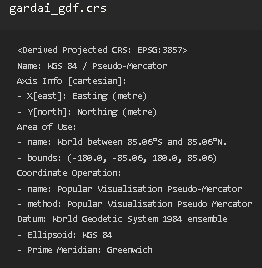

In [45]:
# reading in the the shapefile
gardai_gdf = gpd.read_file('Data/Gardai Boundaries/garda_sub_districts.json')
gardai_gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Gardai GeoDataFrame

In [46]:
gardai_gdf.head(50)

,FID,Sub_Dstric,Division,County_1,County_2,Area_sq_km,Area_sq_mi,TOTPOP_CY,geometry
0,0,Bagenalstown,Waterford & Kilkenny/Carlow,Carlow,,175.570,67.788,9167.0,"POLYGON ((-784033.150 6946383.889, -783296.747..."
1,1,Ballon,Waterford & Kilkenny/Carlow,Carlow,,135.948,52.490,5033.0,"POLYGON ((-747059.740 6941740.064, -746602.921..."
2,2,Borris,Waterford & Kilkenny/Carlow,Carlow,,139.183,53.739,3366.0,"POLYGON ((-760555.199 6894626.669, -760562.634..."
3,3,Carlow,Waterford & Kilkenny/Carlow,Carlow,Kilkenny,121.261,46.819,31403.0,"POLYGON ((-758537.102 6943175.077, -759080.329..."
4,4,Hacketstown,Waterford & Kilkenny/Carlow,Carlow,,61.464,23.732,2054.0,"POLYGON ((-733242.448 6960758.533, -733104.500..."
5,5,Myshall [SS],Waterford & Kilkenny/Carlow,Carlow,,79.842,30.827,2307.0,"POLYGON ((-754782.642 6912675.352, -754918.823..."
6,6,Rathvilly,Waterford & Kilkenny/Carlow,Carlow,,73.155,28.245,2713.0,"POLYGON ((-742836.944 6951888.881, -743042.536..."
7,7,Tullow,Waterford & Kilkenny/Carlow,Carlow,,74.707,28.845,7491.0,"POLYGON ((-759006.422 6959076.294, -758971.187..."
8,8,Arvagh,Louth & Cavan/Monaghan,Cavan,,83.095,32.083,2276.0,"POLYGON ((-834805.977 7168609.394, -834782.150..."
9,9,Bailieboro,Louth & Cavan/Monaghan,Cavan,,130.592,50.422,6300.0,"POLYGON ((-790538.227 7156729.978, -790535.581..."


In [47]:
# renaming columns to lower case
gardai_gdf_columns = list(map(lambda x: x.lower(), list(gardai_gdf.columns)))
gardai_gdf_columns = list(map(lambda x: x.replace(' ', '_'), gardai_gdf_columns))
gardai_gdf.columns= gardai_gdf_columns

In [48]:

gardai_gdf['sub_dstric'] = gardai_gdf['sub_dstric'].str.upper()

gardai_gdf['division'] = gardai_gdf['division'].str.upper()

gardai_gdf['county_1'] = gardai_gdf['county_1'].str.upper()

gardai_gdf['county_2'] = gardai_gdf['county_2'].str.upper()


In [49]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*gardai_gdf.shape))

The dataset has 567 rows and 9 columns.


In [50]:
DUBLIN_gardai_gdf = gardai_gdf[(gardai_gdf['division'].str.contains('DMR')) |
          (gardai_gdf['county_1'].str.contains('DUBLIN')) |
          (gardai_gdf['county_2'].str.contains('DUBLIN'))]



<AxesSubplot:>

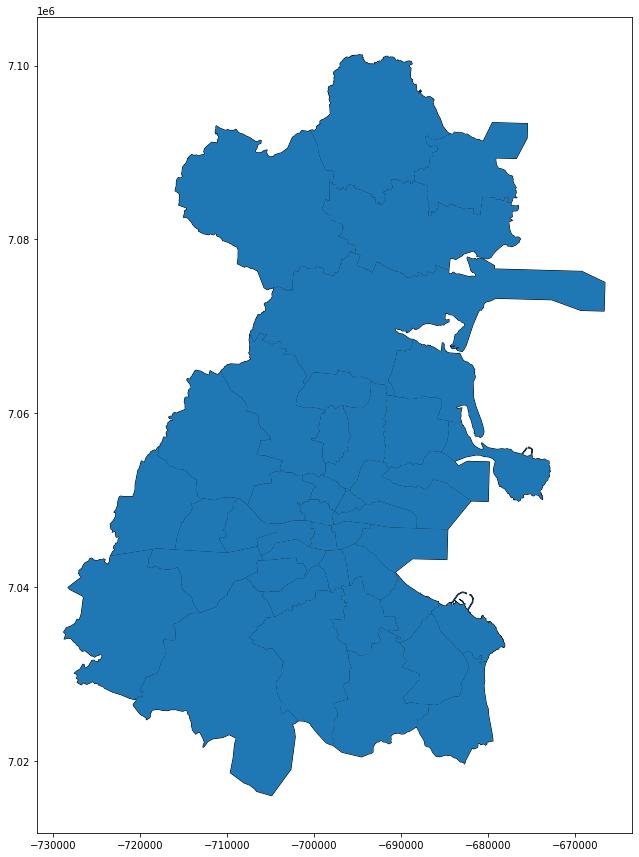

In [51]:
fig,ax = plt.subplots(figsize = (15,15))
DUBLIN_gardai_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
DUBLIN_gardai_gdf.plot(ax = ax)

<AxesSubplot:>

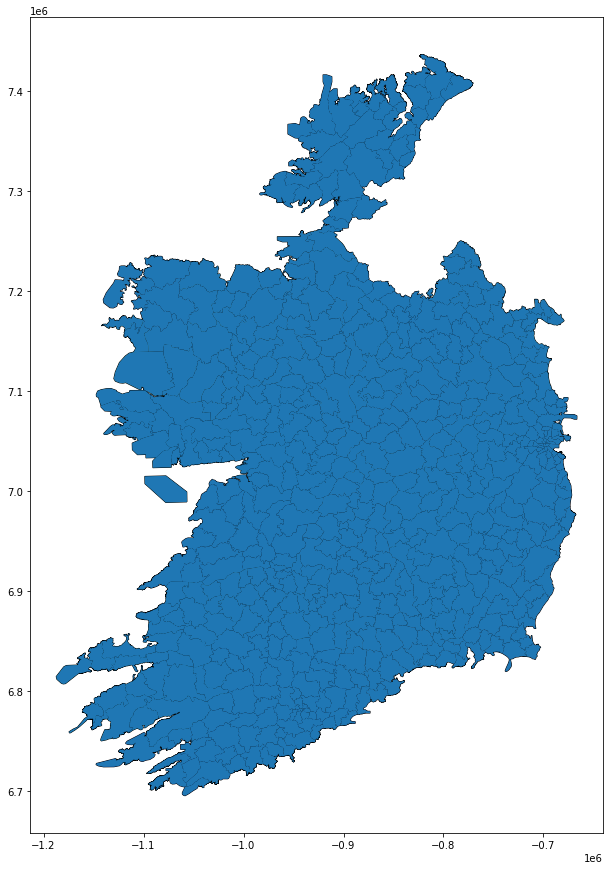

In [52]:
fig,ax = plt.subplots(figsize = (15,15))
gardai_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
gardai_gdf.plot(ax = ax)

#### Area of Gardai Sub-Division

In [53]:
area_gardai_gdf = gardai_gdf.to_crs({'init' :'epsg:2157'}) 

for i in range(len(area_gardai_gdf)):
    area_gardai_gdf.loc[i,'area_in_m2'] = shape(area_gardai_gdf.loc[i,'geometry']).area
    
area_gardai_gdf['area_in_km2'] = area_gardai_gdf['area_in_m2'] /1000000

gardai_gdf['area_in_km2'] = area_gardai_gdf['area_in_km2']

C:\Users\Karina\miniconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [54]:
gardai_gdf.head(10)

,fid,sub_dstric,division,county_1,county_2,area_sq_km,area_sq_mi,totpop_cy,geometry,area_in_km2
0,0,BAGENALSTOWN,WATERFORD & KILKENNY/CARLOW,CARLOW,,175.570,67.788,9167.0,"POLYGON ((-784033.150 6946383.889, -783296.747...",176.234894
1,1,BALLON,WATERFORD & KILKENNY/CARLOW,CARLOW,,135.948,52.490,5033.0,"POLYGON ((-747059.740 6941740.064, -746602.921...",136.471266
2,2,BORRIS,WATERFORD & KILKENNY/CARLOW,CARLOW,,139.183,53.739,3366.0,"POLYGON ((-760555.199 6894626.669, -760562.634...",139.708805
3,3,CARLOW,WATERFORD & KILKENNY/CARLOW,CARLOW,KILKENNY,121.261,46.819,31403.0,"POLYGON ((-758537.102 6943175.077, -759080.329...",121.724052
4,4,HACKETSTOWN,WATERFORD & KILKENNY/CARLOW,CARLOW,,61.464,23.732,2054.0,"POLYGON ((-733242.448 6960758.533, -733104.500...",61.705184
5,5,MYSHALL [SS],WATERFORD & KILKENNY/CARLOW,CARLOW,,79.842,30.827,2307.0,"POLYGON ((-754782.642 6912675.352, -754918.823...",80.147610
6,6,RATHVILLY,WATERFORD & KILKENNY/CARLOW,CARLOW,,73.155,28.245,2713.0,"POLYGON ((-742836.944 6951888.881, -743042.536...",73.439921
7,7,TULLOW,WATERFORD & KILKENNY/CARLOW,CARLOW,,74.707,28.845,7491.0,"POLYGON ((-759006.422 6959076.294, -758971.187...",74.995199
8,8,ARVAGH,LOUTH & CAVAN/MONAGHAN,CAVAN,,83.095,32.083,2276.0,"POLYGON ((-834805.977 7168609.394, -834782.150...",83.424080
9,9,BAILIEBORO,LOUTH & CAVAN/MONAGHAN,CAVAN,,130.592,50.422,6300.0,"POLYGON ((-790538.227 7156729.978, -790535.581...",131.120192


In [55]:
gardai_gdf[gardai_gdf['division'].str.contains('GALWAY')]

,fid,sub_dstric,division,county_1,county_2,area_sq_km,area_sq_mi,totpop_cy,geometry,area_in_km2
163,163,AHASCRAGH,GALWAY,GALWAY,,133.201,51.429,2378.0,"POLYGON ((-922552.694 7070978.097, -922559.520...",133.711175
164,164,ARDRAHAN,GALWAY,GALWAY,,88.136,34.029,3196.0,"POLYGON ((-993111.783 7009783.101, -993463.747...",88.474214
165,165,ATHENRY,GALWAY,GALWAY,,191.530,73.950,11448.0,"POLYGON ((-987230.979 7038622.609, -988026.538...",192.267397
166,166,BALLINASLOE,GALWAY,GALWAY,,83.749,32.336,9047.0,"POLYGON ((-916209.002 7048173.930, -916273.924...",84.067426
167,167,BALLYGAR,GALWAY,GALWAY,,94.106,36.334,2260.0,"POLYGON ((-922552.694 7070978.097, -922743.603...",94.468816
168,168,BARNADERG,GALWAY,GALWAY,,112.374,43.388,3731.0,"POLYGON ((-963981.691 7064074.104, -964230.555...",112.810909
169,169,CARNA,GALWAY,GALWAY,,239.590,92.506,1759.0,"POLYGON ((-1089156.586 7058326.693, -1089086.2...",240.587378
170,170,CARRAROE,GALWAY,GALWAY,,42.480,16.401,2595.0,"POLYGON ((-1061860.458 7034759.337, -1061947.9...",42.652369
171,171,CLIFDEN,GALWAY,GALWAY,,283.701,109.537,3837.0,"POLYGON ((-1094004.912 7066266.243, -1094355.5...",284.918535
172,172,COROFIN,GALWAY,GALWAY,,88.469,34.158,4859.0,"POLYGON ((-979035.387 7057396.913, -979481.009...",88.815176


<AxesSubplot:>

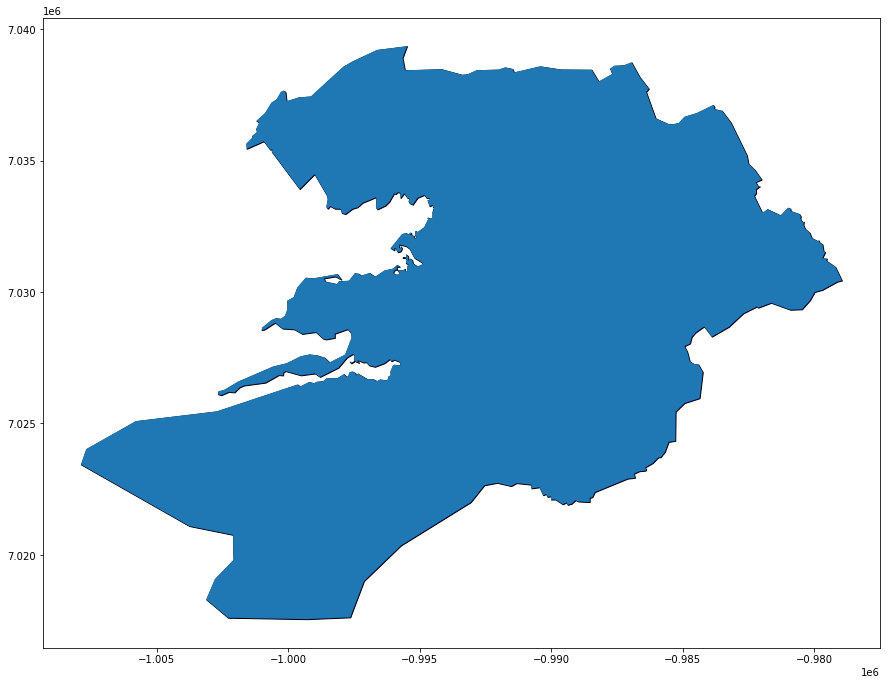

In [56]:
DRAW_ARANMORE = gardai_gdf[(gardai_gdf['sub_dstric'].str.contains('ORANMORE'))|
          (gardai_gdf['sub_dstric'].str.contains('ARANMORE'))]

fig,ax = plt.subplots(figsize = (15,15))
DRAW_ARANMORE.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
DRAW_ARANMORE.plot(ax = ax)

In [57]:
gardai_gdf = gardai_gdf[['sub_dstric', 'division','geometry','totpop_cy']]

### Crime Data

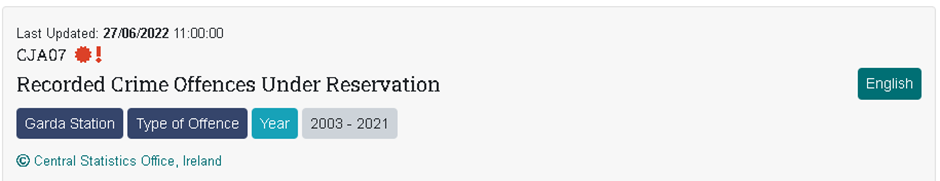

In [58]:
crime_df = pd.read_csv('Data/crime_data_2011.csv')

In [59]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*crime_df.shape))

The dataset has 6768 rows and 6 columns.


In [60]:
crime_df.columns

Index(['STATISTIC', 'Year', 'Garda Station', 'Type of Offence', 'UNIT',
       'VALUE'],
      dtype='object')

In [61]:
# Looking for all the unique values in all the columns
column = crime_df.columns
for i in column:
    print('\n',i,'\n',crime_df[i].unique(),'\n','-'*80)


 STATISTIC 
 ['Recorded Crime Offences Under Reservation'] 
 --------------------------------------------------------------------------------

 Year 
 [2021] 
 --------------------------------------------------------------------------------

 Garda Station 
 ['35301 Abbeyfeale, Limerick Division'
 '41201 Abbeyleix, Laois/Offaly Division' '35302 Adare, Limerick Division'
 '54101 Aglish, Waterford Division' '23101 Ahascragh, Galway Division'
 '12501 Ailt an Chorraiin, Donegal Division'
 '12502 An Bun Beag, Donegal Division'
 '12503 An Charraig, Donegal Division'
 '23601 An Cheathru Rua, Galway Division'
 '12504 An Clochain Liath, Donegal Division'
 '34101 An Coirean, Kerry Division' '12401 An Craoslach, Donegal Division'
 '12402 An Fail Carrach, Donegal Division'
 '23201 An Maim, Galway Division' '54102 An Rinn, Waterford Division'
 '23602 An Spideal, Galway Division'
 '31101 Anglesea Street, Cork City Division'
 '34303 Annascaul, Kerry Division' '23301 Aran More, Galway Division'
 '125

In [62]:
# dropping irrelenvant colunns
crime_df = crime_df.drop(['UNIT',  'STATISTIC', 'Year' ], axis=1)

# renaming columns to lower case
crime_df_columns = list(map(lambda x: x.lower(), list(crime_df.columns)))
crime_df_columns = list(map(lambda x: x.replace(' ', '_'), crime_df_columns))
crime_df.columns= crime_df_columns

crime_df['garda_station'] = crime_df['garda_station'].str.upper()


# splitting the 'garda_station' on the first comma and space
crime_df_values = crime_df['garda_station'].str.split(', ', 1,  expand = True)
# assigning column names to variables
crime_df[['number_station', 'division']] = crime_df_values


# splitting the 'number_station' on the first space
crime_df_values = crime_df['number_station'].str.split(' ', 1,  expand = True)
# assigning column names to variables
crime_df[['number', 'station']] = crime_df_values

# renaming 'value' column into 'count'
crime_df = crime_df.rename(columns={"value": "count"})

#reorderding
crime_df = crime_df[['garda_station', 
                    'type_of_offence', 
                    'count',
                    'number',
                     'station',
                     'division']]

In [63]:
crime_df = crime_df[['station','type_of_offence',  'count']]
crime_df

,station,type_of_offence,count
0,ABBEYFEALE,"Attempts/threats to murder, assaults, harassme...",23
1,ABBEYFEALE,Dangerous or negligent acts,10
2,ABBEYFEALE,Kidnapping and related offences,1
3,ABBEYFEALE,"Robbery, extortion and hijacking offences",0
4,ABBEYFEALE,Burglary and related offences,18
...,...,...,...
6763,YOUGHAL,Controlled drug offences,41
6764,YOUGHAL,Weapons and Explosives Offences,3
6765,YOUGHAL,Damage to property and to the environment,52
6766,YOUGHAL,Public order and other social code offences,64


In [64]:
# renaming columns to lower case
crime_df_columns = list(map(lambda x: x.lower(), list(crime_df.columns)))
crime_df_columns = list(map(lambda x: x.replace(' ', '_'), crime_df_columns))
crime_df.columns= crime_df_columns

In [65]:
crime_df

,station,type_of_offence,count
0,ABBEYFEALE,"Attempts/threats to murder, assaults, harassme...",23
1,ABBEYFEALE,Dangerous or negligent acts,10
2,ABBEYFEALE,Kidnapping and related offences,1
3,ABBEYFEALE,"Robbery, extortion and hijacking offences",0
4,ABBEYFEALE,Burglary and related offences,18
...,...,...,...
6763,YOUGHAL,Controlled drug offences,41
6764,YOUGHAL,Weapons and Explosives Offences,3
6765,YOUGHAL,Damage to property and to the environment,52
6766,YOUGHAL,Public order and other social code offences,64


In [66]:
crime_df['station'][crime_df['station'].str.contains('AILT AN CHORRAIIN')] ='BURTONPORT'
crime_df['station'][crime_df['station'].str.contains('AN BUN BEAG')] ='BUNBEG'
crime_df['station'][crime_df['station'].str.contains('AN CHARRAIG')] ='CARRICK'
crime_df['station'][crime_df['station'].str.contains('AN CHEATHRU RUA')] ='CARRAROE'
crime_df['station'][crime_df['station'].str.contains('AN CLOCHAIN LIATH')] ='DUNGLOE'
crime_df['station'][crime_df['station'].str.contains('AN COIREAN')] ='WATERVILLE'
crime_df['station'][crime_df['station'].str.contains('AN CRAOSLACH')] ='CREESLOUGH'
crime_df['station'][crime_df['station'].str.contains('AN FAIL CARRACH')] ='FALCARRAGH'
crime_df['station'][crime_df['station'].str.contains('AN MAIM')] ='MAUM'
crime_df['station'][crime_df['station'].str.contains('AN RINN')] ='RINGVILLE'
crime_df['station'][crime_df['station'].str.contains('ARD AN RAITHA')] ='ARDARA'
crime_df['station'][crime_df['station'].str.contains('DONEGAL')] ='DONEGAL'
crime_df['station'][crime_df['station'].str.contains('STRADBALLY')] ='STRADBALLY'
crime_df['station'][crime_df['station'].str.contains('MAYORSTONE PARK')] ='MAYORSTONE'
crime_df['station'][crime_df['station'].str.contains('GAILLIMH')] ='GALWAY'
crime_df['station'][crime_df['station'].str.contains('AN SPIDEAL')] ='SPIDDLE'
crime_df['station'][crime_df['station'].str.contains('KELLS')] ='KELLS'
crime_df['station'][crime_df['station'].str.contains('CASTLEBELLINGHAM')] ='CASTLEBELLINHAM'
crime_df['station'][crime_df['station'].str.contains('BAILE')] ='ATHBOY'
crime_df['station'][crime_df['station'].str.contains('BRIDEWELL')] ='BRIDEWELL'
crime_df['station'][crime_df['station'].str.contains('STRADBALLY')] ='STRADBALLY'
crime_df['station'][crime_df['station'].str.contains('MAYORSTONE PARK')] ='MAYORSTONE'
crime_df['station'][crime_df['station'].str.contains('GAILLIMH')] ='GALWAY'
crime_df['station'][crime_df['station'].str.contains('AN SPIDEAL')] ='SPIDDLE'
crime_df['station'][crime_df['station'].str.contains('BOTHAR NA TRA')] ='SALTHILL'
crime_df['station'][crime_df['station'].str.contains('BÉAL AN MHUIRTHEAD')] ='BELMULLET'
crime_df['station'][crime_df['station'].str.contains('THA AN GHAORTHAIDH')] ='STRADBALLY'
crime_df['station'][crime_df['station'].str.contains('CARRAIG AIRT')] ='CARRIGART'
crime_df['station'][crime_df['station'].str.contains('CARRIG NA BHFEAR')] ='KILRONAN'
crime_df['station'][crime_df['station'].str.contains('CILL RONAIN')] ='STRADBALLY'
crime_df['station'][crime_df['station'].str.contains('CLOCH NA RON')] ='ROUNDSTONE'
crime_df['station'][crime_df['station'].str.contains('DUN FIONNACHAID')] ='DUNFANAGHY'
crime_df['station'][crime_df['station'].str.contains('GLEANN NA MUAIDHE')] ='GLENAMOY'
crime_df['station'][crime_df['station'].str.contains('GOB AN CHOIRE')] ='ACHILL SOUND'
crime_df['station'][crime_df['station'].str.contains('INDREABHAIN')] ='INVERIN'
crime_df['station'][crime_df['station'].str.contains('LEACH SEOIRSE')] ='LOUGHGEORGE'
crime_df['station'][crime_df['station'].str.contains('MAIGH CUILINN')] ='MOYCULLEN'
crime_df['station'][crime_df['station'].str.contains('MUINE BHEAG')] ='BAGENALSTOWN'
crime_df['station'][crime_df['station'].str.contains('NA CEALLA BEAGA')] ='KILLYBEGS'
crime_df['station'][crime_df['station'].str.contains('NA GLEANNTA')] ='GLENTIES'
crime_df['station'][crime_df['station'].str.contains('SRAITH SALACH')] ='STRADBALLY'
crime_df['station'][crime_df['station'].str.contains('STRADBALLY')] ='RECESS'
crime_df['station'][crime_df['station'].str.contains('BENNETTSBRIDGE')] ='BENNETSBRIDGE'
crime_df['station'][crime_df['station'].str.contains('BALLAGHDERREEN')] ='BALLAGHADERREEN'
crime_df['station'][crime_df['station'].str.contains('BALLYLINAN')] ='BALLYLYNAN'
crime_df['station'][crime_df['station'].str.contains('RINGVILLE')] ='RING'
crime_df['station'][crime_df['station'].str.contains('KERRYKEEL')] ='CARROWKEEL'

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['station'][crime_df['station'].str.contains('AN BUN BEAG')] ='BUNBEG'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['station'][crime_df['station'].str.contains('AN CHARRAIG')] ='CARRICK'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['station'][crime_df['station'].str.contains('AN SPIDEAL')] ='SPIDDLE'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['station'][crime_df['station'].str.contains('BOTHAR NA TRA')] ='SALTHILL'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['station'][crime_df['station'].str.contains('RINGVILLE')] ='RING'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\4046410635.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['station'][crime_df['station'].str.contains('KERRYKEEL')] ='CARROWKEEL'


In [67]:
# pivoting table
crime_df_pivot_table = pd.pivot_table(crime_df, values='count', index= ['station'],
                    columns=['type_of_offence']).reset_index().reset_index()

In [68]:
crime_df_pivot_table.columns

Index(['index', 'station',
       'Attempts/threats to murder, assaults, harassments and related offences',
       'Burglary and related offences', 'Controlled drug offences',
       'Damage to property and to the environment',
       'Dangerous or negligent acts', 'Fraud, deception and related offences',
       'Kidnapping and related offences',
       'Offences against government, justice procedures and organisation of crime',
       'Public order and other social code offences',
       'Robbery, extortion and hijacking offences',
       'Theft and related offences', 'Weapons and Explosives Offences'],
      dtype='object', name='type_of_offence')

In [69]:
crime_df_pivot_table.head()

type_of_offence,index,station,"Attempts/threats to murder, assaults, harassments and related offences",Burglary and related offences,Controlled drug offences,Damage to property and to the environment,Dangerous or negligent acts,"Fraud, deception and related offences",Kidnapping and related offences,"Offences against government, justice procedures and organisation of crime",Public order and other social code offences,"Robbery, extortion and hijacking offences",Theft and related offences,Weapons and Explosives Offences
0,0,ABBEYFEALE,23.0,18.0,5.0,15.0,10.0,11.0,1.0,1.0,24.0,0.0,23.0,1.0
1,1,ABBEYLEIX,21.0,10.0,9.0,11.0,5.0,24.0,0.0,2.0,11.0,1.0,28.0,0.0
2,2,ACHILL SOUND,3.0,0.0,5.0,5.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,2.0
3,3,ADARE,3.0,10.0,0.0,5.0,4.0,10.0,0.0,1.0,3.0,0.0,6.0,0.0
4,4,AGLISH,3.0,2.0,7.0,5.0,4.0,2.0,0.0,0.0,7.0,0.0,5.0,0.0


In [70]:
crime_df_pivot_table = crime_df_pivot_table.drop(['index'], axis=1)

In [71]:
crime_df_pivot_table.head()

type_of_offence,station,"Attempts/threats to murder, assaults, harassments and related offences",Burglary and related offences,Controlled drug offences,Damage to property and to the environment,Dangerous or negligent acts,"Fraud, deception and related offences",Kidnapping and related offences,"Offences against government, justice procedures and organisation of crime",Public order and other social code offences,"Robbery, extortion and hijacking offences",Theft and related offences,Weapons and Explosives Offences
0,ABBEYFEALE,23.0,18.0,5.0,15.0,10.0,11.0,1.0,1.0,24.0,0.0,23.0,1.0
1,ABBEYLEIX,21.0,10.0,9.0,11.0,5.0,24.0,0.0,2.0,11.0,1.0,28.0,0.0
2,ACHILL SOUND,3.0,0.0,5.0,5.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,2.0
3,ADARE,3.0,10.0,0.0,5.0,4.0,10.0,0.0,1.0,3.0,0.0,6.0,0.0
4,AGLISH,3.0,2.0,7.0,5.0,4.0,2.0,0.0,0.0,7.0,0.0,5.0,0.0


In [72]:
# creating 'Total' 
crime_df_pivot_table['crime_total']= crime_df_pivot_table.sum(axis=1)

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\3214251143.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_df_pivot_table['crime_total']= crime_df_pivot_table.sum(axis=1)


In [73]:
crime_df_pivot_table = crime_df_pivot_table[['station', 'crime_total']]

### Combing Boundaries and Crime Statistics

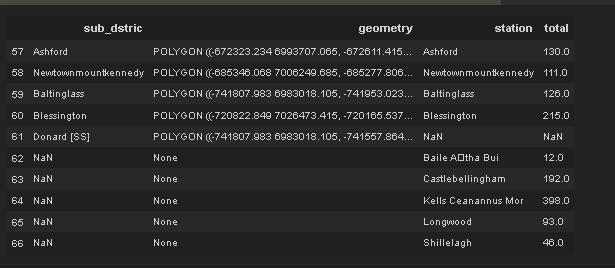

In [74]:
sub_stations = list(gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('\[SS\]', '')].unique())

new_sub_stations = []
for sub_station in sub_stations:
    new_sub_station = sub_station.strip(' \[SS\]')
    new_sub_stations.append(new_sub_station )
print(new_sub_stations)


['MYSHALL', 'BALTIMORE', 'INNISHANNON', 'KEALKIL', 'CLOGHER', 'CREESLOUGH', 'RATHMULLEN', 'MOYCULLEN', 'RECE', 'ANASCAUL', 'BALLYFERRITER', 'TONEYFORD', 'MURROE', 'LONGWOOD', 'ROCKCORRY', 'TAGHMACONNEL', 'BALLINGARRY NORTH', 'EMLY', 'TEMPLEDERRY', 'CASTLEBRIDGE', 'BALLYCROY', 'DONARD']


#### COROFFIN

In [75]:
gardai_gdf[(gardai_gdf['sub_dstric'].str.contains('COROFIN'))]

,sub_dstric,division,geometry,totpop_cy
27,COROFIN,CLARE/TIPPERARY,"POLYGON ((-1007059.869 6964012.437, -1007074.5...",2578.0
172,COROFIN,GALWAY,"POLYGON ((-979035.387 7057396.913, -979481.009...",4859.0


In [76]:
gardai_gdf.at[27, 'sub_dstric'] = 'COROFIN CO. CLARE'

gardai_gdf.at[172, 'sub_dstric'] = 'COROFIN CO. GALWAY'

In [77]:
gardai_gdf['sub_dstric'][(gardai_gdf['sub_dstric'].str.contains('COROFIN'))]

27      COROFIN CO. CLARE
172    COROFIN CO. GALWAY
Name: sub_dstric, dtype: object

#### Cleaning other stations

###### Sub-Station

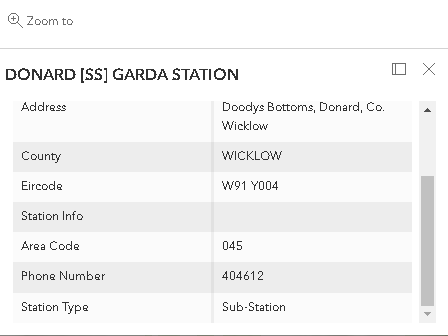

In [78]:
gardai_gdf['sub_dstric'] = gardai_gdf['sub_dstric'].str.replace(' \[SS\]', '')
gardai_gdf['sub_dstric'] = gardai_gdf['sub_dstric'].str.strip()
crime_df_pivot_table['station'] = crime_df_pivot_table['station'].str.strip()

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\674349268.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gardai_gdf['sub_dstric'] = gardai_gdf['sub_dstric'].str.replace(' \[SS\]', '')
C:\Users\Karina\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\674349268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr

In [79]:
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('SHILLEAGH')] ='SHILLELAGH'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('AIRPORT')] ='DUBLIN AIRPORT'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('GLASSAN')] ='GLASSON'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('TOBERCURRY')] ='TUBBERCURRY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('TAGHMACONNEL')] ='TAUGHMACONNELL'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('SCARRIFF')] ='SCARIFF'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ROSSCARBERRY')] ='ROSSCARBERY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ROOSKEY')] ='ROOSKY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('RATHCORMACK')] ='RATHCORMAC'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('PILLTOWN')] ='PILTOWN'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('PALLAS GREEN')] ='PALLASGREEN'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('NEWTOWN CUNNINGHAM')] ='NEWTOWNCUNNINGHAM'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('NEWMARKET-ON-FERGUS')] ='NEWMARKET ON FERGUS'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KNOCKGOSHEL')] ='KNOCKNAGOSHEL'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KINNITY')] ='KINNITTY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KILTAMAGH')] ='KILTIMAGH'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KEENAGH')] ='KENAGH'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('DRUMSHANBO')] ='DRUMSHAMBO'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('DROMCOLLOGHER')] ='DRUMCOLLOGHER'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('CASTLEFINN')] ='CASTLEFIN'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('CASTLEBLANEY')] ='CASTLEBLAYNEY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ANASCAUL')] ='ANNASCAUL'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ARVAGH')] ='ARVA'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('BALLYBUNNION')] ='BALLYBUNION'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('BORRIS-IN-OSSERY')] ='BORRIS-IN-OSSORY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KILADYSART')] ='KILDYSART'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('GRAIGUENMANAGH')] ='GRAIGUENAMANAGH'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('GLANTANE')] ='GLANTAINE'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('HOSPITAL')] ='HOSPITAL CO LIMERICK'

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1649059296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('SHILLEAGH')] ='SHILLELAGH'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1649059296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('AIRPORT')] ='DUBLIN AIRPORT'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1649059296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1649059296.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ANASCAUL')] ='ANNASCAUL'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1649059296.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ARVAGH')] ='ARVA'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1649059296.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [80]:
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('TOBERCURRY')] ='TUBBERCURRY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('TAGHMACONNEL')] ='TAUGHMACONNELL'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('SCARRIFF')] ='SCARIFF'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ROSSCARBERRY')] ='ROSSCARBERY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ROOSKEY')] ='ROOSKY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('RATHCORMACK')] ='RATHCORMAC'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('PILLTOWN')] ='PILTOWN'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('PALLAS GREEN')] ='PALLASGREEN'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('NEWTOWN CUNNINGHAM')] ='NEWTOWNCUNNINGHAM'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('NEWMARKET-ON-FERGUS')] ='NEWMARKET ON FERGUS'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KNOCKGOSHEL')] ='KNOCKNAGOSHEL'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KINNITY')] ='KINNITTY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KILTAMAGH')] ='KILTIMAGH'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KEENAGH')] ='KENAGH'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('DRUMSHANBO')] ='DRUMSHAMBO'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('DROMCOLLOGHER')] ='DRUMCOLLOGHER'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('DONEGAL')] ='DONEGAL'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('CASTLEFINN')] ='CASTLEFIN'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('CASTLEBLANEY')] ='CASTLEBLAYNEY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ANASCAUL')] ='ANNASCAUL'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('ARVAGH')] ='ARVA'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('BALLYBUNNION')] ='BALLYBUNION'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('BORRIS-IN-OSSERY')] ='BORRIS-IN-OSSORY'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KILADYSART')] ='KILDYSART'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('GRAIGUENMANAGH')] ='GRAIGUENAMANAGH'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('GLANTANE')] ='GLANTAINE'
gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('HOSPITAL')] ='HOSPITAL CO LIMERICK'



C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1772618064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('TOBERCURRY')] ='TUBBERCURRY'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1772618064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('TAGHMACONNEL')] ='TAUGHMACONNELL'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1772618064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1772618064.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('BORRIS-IN-OSSERY')] ='BORRIS-IN-OSSORY'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1772618064.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardai_gdf['sub_dstric'][gardai_gdf['sub_dstric'].str.contains('KILADYSART')] ='KILDYSART'
C:\Users\Karina\AppData\Local\Temp\ipykernel_18100\1772618064.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

### Merge

In [81]:
#Merging 
combine_gardai_gdf = gardai_gdf.merge(crime_df_pivot_table, left_on='sub_dstric', right_on='station', how='left')
combine_gardai_gdf

,sub_dstric,division,geometry,totpop_cy,station,crime_total
0,BAGENALSTOWN,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-784033.150 6946383.889, -783296.747...",9167.0,BAGENALSTOWN,138.0
1,BALLON,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-747059.740 6941740.064, -746602.921...",5033.0,BALLON,49.0
2,BORRIS,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-760555.199 6894626.669, -760562.634...",3366.0,BORRIS,22.0
3,CARLOW,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-758537.102 6943175.077, -759080.329...",31403.0,CARLOW,1307.0
4,HACKETSTOWN,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-733242.448 6960758.533, -733104.500...",2054.0,HACKETSTOWN,22.0
...,...,...,...,...,...,...
562,FINGLAS,DMR WEST,"POLYGON ((-707400.291 7069048.900, -707392.971...",47460.0,FINGLAS,3069.0
563,MOUNTJOY,DMR NC,"POLYGON ((-701305.216 7052277.960, -701301.997...",26441.0,MOUNTJOY,1726.0
564,CABRA,DMR WEST,"POLYGON ((-707629.717 7049465.843, -706800.619...",24288.0,CABRA,905.0
565,RATHCOOLE,DMR WEST,"POLYGON ((-718542.533 7044392.754, -718795.180...",15370.0,RATHCOOLE,678.0


In [82]:
blanks = combine_gardai_gdf[['sub_dstric', 'station', 'crime_total']][(combine_gardai_gdf['sub_dstric'].isna()) |
                         (combine_gardai_gdf['station'].isna())].reset_index(drop = True)
blanks.head(50)

,sub_dstric,station,crime_total
0,BALLINGEARY,NaN,NaN
1,BALLYVOURNEY,NaN,NaN
2,ORANMORE,NaN,NaN
3,BALLYFERRITER,NaN,NaN
4,STRADBALLY,NaN,NaN
5,STEPASIDE,NaN,NaN
6,DONARD,NaN,NaN
7,CARRIGNAVAR,NaN,NaN
8,BALLINSPITTLE,NaN,NaN


##### Missing data

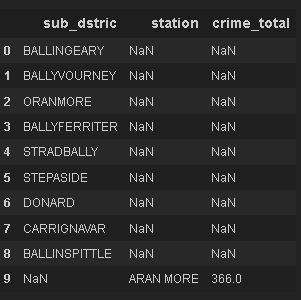

In [83]:
for station in blanks['station'].sort_values(ascending=True):
    print(station)

nan
nan
nan
nan
nan
nan
nan
nan
nan


In [84]:
for station in blanks['sub_dstric'].sort_values(ascending=True):
    print(station)

BALLINGEARY
BALLINSPITTLE
BALLYFERRITER
BALLYVOURNEY
CARRIGNAVAR
DONARD
ORANMORE
STEPASIDE
STRADBALLY


<AxesSubplot:>

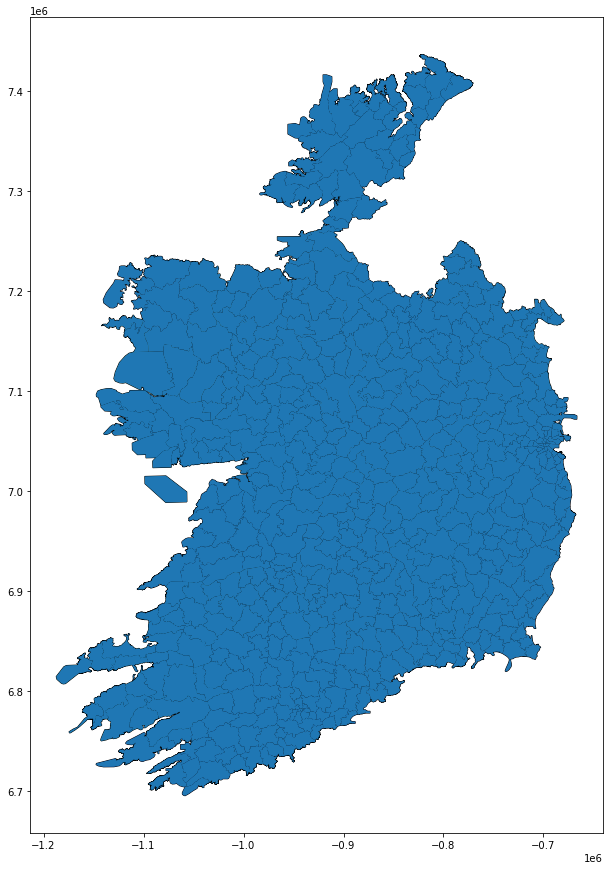

In [85]:
fig,ax = plt.subplots(figsize = (15,15))
combine_gardai_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
combine_gardai_gdf.plot(ax = ax)

#### Save Data

In [86]:
combine_gardai_gdf.tail()

,sub_dstric,division,geometry,totpop_cy,station,crime_total
562,FINGLAS,DMR WEST,"POLYGON ((-707400.291 7069048.900, -707392.971...",47460.0,FINGLAS,3069.0
563,MOUNTJOY,DMR NC,"POLYGON ((-701305.216 7052277.960, -701301.997...",26441.0,MOUNTJOY,1726.0
564,CABRA,DMR WEST,"POLYGON ((-707629.717 7049465.843, -706800.619...",24288.0,CABRA,905.0
565,RATHCOOLE,DMR WEST,"POLYGON ((-718542.533 7044392.754, -718795.180...",15370.0,RATHCOOLE,678.0
566,TALLAGHT,DMR SOUTH,"POLYGON ((-720822.849 7026473.415, -720607.207...",87715.0,TALLAGHT,4290.0


In [89]:
combine_gardai_gdf['division'].unique()

array(['WATERFORD & KILKENNY/CARLOW', 'LOUTH & CAVAN/MONAGHAN',
       'LIMERICK', 'CLARE/TIPPERARY', 'CORK CITY', 'CORK COUNTY',
       'DONEGAL & SLIGO/LEITRIM', 'DMR NORTH', 'DMR WEST', 'DMR EAST',
       'DMR SOUTH', 'GALWAY', 'KERRY', 'LAOIS/OFFALY & KILDARE',
       'MAYO/ROSCOMMON & LONGFORD', 'WESTMEATH/MEATH', 'WEXFORD/WICKLOW',
       'DMR SC', 'DMR NC'], dtype=object)

In [93]:
# TOP 10 SUB DIVISIONS WITH HIGH CRIME RATE!
combine_gardai_gdf[['sub_dstric', 'crime_total']][combine_gardai_gdf['division'].str.contains('DMR SC|DMR NC|DMR NORTH|DMR WEST|DMR EAST|DMR SOUTH|LOUTH & CAVAN/MONAGHAN|WESTMEATH/MEATH|WEXFORD/WICKLOW')].sort_values(by = 'crime_total', ascending = False).head(10)

,sub_dstric,crime_total
527,STORE STREET,6959.0
529,PEARSE STREET,6613.0
149,BLANCHARDSTOWN,5000.0
566,TALLAGHT,4290.0
159,RONANSTOWN,3077.0
562,FINGLAS,3069.0
537,BRIDEWELL,2912.0
152,COOLOCK,2669.0
530,KEVIN STREET,2535.0
328,DUNDALK,2417.0


In [88]:
combine_gardai_gdf.to_file('Data/Shapefiles/clean_crime_and_gardai_sub_districts_pivoted.geojson', index=False)

### MELT Data

In [91]:
crime_df.head()

,station,type_of_offence,count
0,ABBEYFEALE,"Attempts/threats to murder, assaults, harassme...",23
1,ABBEYFEALE,Dangerous or negligent acts,10
2,ABBEYFEALE,Kidnapping and related offences,1
3,ABBEYFEALE,"Robbery, extortion and hijacking offences",0
4,ABBEYFEALE,Burglary and related offences,18


In [92]:
#Merging 
combine_gardai_gdf_melt = gardai_gdf.merge(crime_df, left_on='sub_dstric', right_on='station', how='left')
combine_gardai_gdf_melt

,sub_dstric,division,geometry,totpop_cy,station,type_of_offence,count
0,BAGENALSTOWN,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-784033.150 6946383.889, -783296.747...",9167.0,BAGENALSTOWN,"Attempts/threats to murder, assaults, harassme...",19.0
1,BAGENALSTOWN,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-784033.150 6946383.889, -783296.747...",9167.0,BAGENALSTOWN,Dangerous or negligent acts,6.0
2,BAGENALSTOWN,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-784033.150 6946383.889, -783296.747...",9167.0,BAGENALSTOWN,Kidnapping and related offences,0.0
3,BAGENALSTOWN,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-784033.150 6946383.889, -783296.747...",9167.0,BAGENALSTOWN,"Robbery, extortion and hijacking offences",0.0
4,BAGENALSTOWN,WATERFORD & KILKENNY/CARLOW,"POLYGON ((-784033.150 6946383.889, -783296.747...",9167.0,BAGENALSTOWN,Burglary and related offences,8.0
...,...,...,...,...,...,...,...
6893,TALLAGHT,DMR SOUTH,"POLYGON ((-720822.849 7026473.415, -720607.207...",87715.0,TALLAGHT,Controlled drug offences,389.0
6894,TALLAGHT,DMR SOUTH,"POLYGON ((-720822.849 7026473.415, -720607.207...",87715.0,TALLAGHT,Weapons and Explosives Offences,51.0
6895,TALLAGHT,DMR SOUTH,"POLYGON ((-720822.849 7026473.415, -720607.207...",87715.0,TALLAGHT,Damage to property and to the environment,636.0
6896,TALLAGHT,DMR SOUTH,"POLYGON ((-720822.849 7026473.415, -720607.207...",87715.0,TALLAGHT,Public order and other social code offences,430.0


<AxesSubplot:>

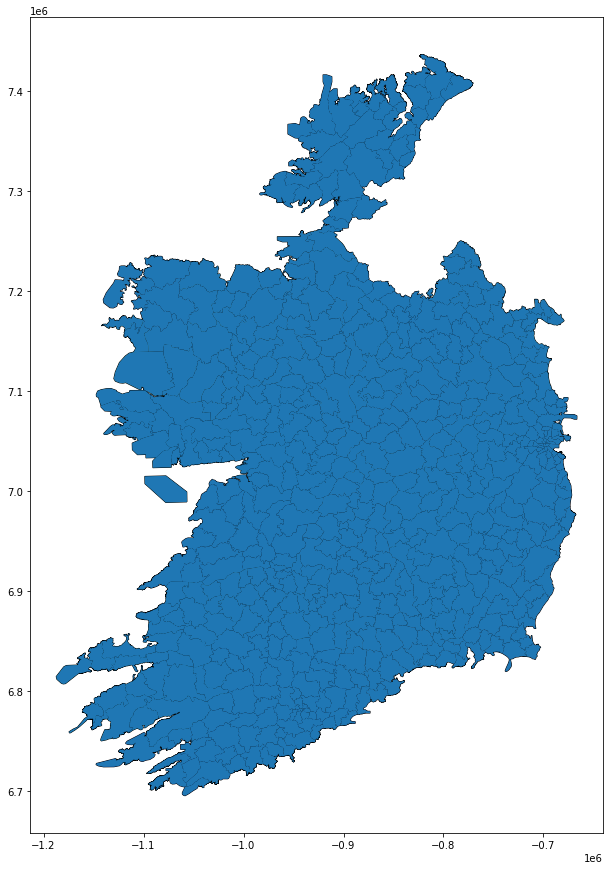

In [90]:
fig,ax = plt.subplots(figsize = (15,15))
combine_gardai_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
combine_gardai_gdf.plot(ax = ax)

#### Save Data

In [93]:
combine_gardai_gdf_melt.to_file('Data/Shapefiles/clean_crime_and_gardai_sub_districts.geojson', index=False)